# Netflix - Movies and Shows Analysis

### Objectives

Extract insights from the data

### Dataset summary

##### **Main Dataset**: [Netflix Movies and TV Shows](https://www.kaggle.com/shivamb/netflix-shows)
    
TV Shows and Movies listed on Netflix
This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

12 columns:
- show_id (string): unique identifier for each movie
- type (string): TV Show or Movie
- title (string): title of the record
- director (string): director of the record
- cast (string): principal actors
- country (string): country where was filmed
- date_added (date): date added to netflix
- release_year (int): year of release
- rating (string): rating audience
- duration (string): duration of the record
- listed_in (string): tags of description
- description (string): description of the record



[//]: # "Cell intentionally left in blank"



In [1]:
# import basic packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("datasets/netflix_titles.csv")
df.shape

(7787, 12)

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


## Normalizing data

To avoid silly mistakes, I'm gonna normalize and standarize the actual data. The first step is convert each column to their respective data type. Because if we see the differents dtypes around the dataset, we can notice that are all object type except the year column. The idea is transform dates into date type

In [4]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [5]:
df["date_added"] = pd.to_datetime(df.date_added)
df.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

Now let's check the missing data, which has NaN values

In [6]:
df.isna().any()

show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration        False
listed_in       False
description     False
dtype: bool

### Getting dummies

There are a lot of categorical variables, so to handle them, get the dummy data from them is a good approach

#### Type dummies: TV Show or Movie

In [7]:
type_dummies = pd.get_dummies(df["type"])
df = pd.concat([df, type_dummies], axis=1)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Movie,TV Show
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,0,1
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,1,0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",1,0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",1,0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1,0


#### Getting the listed_in dummies

Here we have to do a little more of work because the actual tags are all in a single string, so we have to separate them and create the dummies

In [8]:
def get_types_of_listed_in(x):
    # basic formatting to standarize the data
    x = x.lower()
    x = x.split(",")
    x = ["-".join(a.strip().split(" ")) for a in x]
    
    return x
            
for idx, listed_in in zip(df.index.values, df["listed_in"]):
    listed_in_formatted = get_types_of_listed_in(listed_in)
    
    for lis in listed_in_formatted:
        # add each type of 'listed in' as column, if it exists, set to one in the respective index
        # otherwise, create that column and set all the values to 0, except the current index
        if lis in df.columns.values:
            df.at[idx, lis] = 1
        else:
            df[lis] = 0
            df.at[idx, lis] = 1


Let's check if the previous computing was all right. To achieve that, we can watch the values in 'listed_in' in the first row, and it respectives dummies

In [27]:
print("Listed_id of the first row in the dataset " + df.loc[0, "listed_in"])
print("\n")
print("The dummies:: ")
pd.DataFrame(df.loc[0, "international-tv-shows": ]).T

Listed_id of the first row in the dataset International TV Shows, TV Dramas, TV Sci-Fi & Fantasy


The dummies:: 


,international-tv-shows,tv-dramas,tv-sci-fi-&-fantasy,dramas,international-movies,horror-movies,action-&-adventure,independent-movies,sci-fi-&-fantasy,tv-mysteries,...,tv-shows,classic-movies,cult-movies,tv-horror,stand-up-comedy-&-talk-shows,teen-tv-shows,stand-up-comedy,anime-features,tv-thrillers,classic-&-cult-tv
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### Getting the year when the show was added to Netflix

In [66]:
df["year_added"]  = df["date_added"].apply(lambda x: x.year)

### Understanding the "type" variable

First, let's see the count of types of shows

In [59]:
df[["Movie", "TV Show"]].sum()

Movie      5377
TV Show    2410
dtype: int64

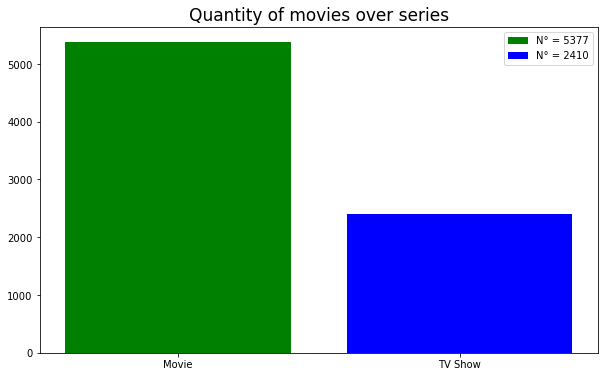

In [100]:
all_movies_and_shows = df[["Movie", "TV Show"]].sum()
fig, ax = plt.subplots(1, figsize=(10,6))
ax.bar(height=all_movies_and_shows["Movie"], x=["Movie"], color=['green'], label="N° = {}".format(all_movies_and_shows["Movie"]))
ax.bar(height=all_movies_and_shows["TV Show"], x=["TV Show"], color=['blue'], label="N° = {}".format(all_movies_and_shows["TV Show"]))
ax.set_title("Quantity of movies over series", fontsize=17)
ax.legend()

As we can see, there has been more movies than series

Let's see the growth of movies and TV Shows added to netflix over the years. 

ALERT SPOILER: In 2021 we will see a significant decrease, but it's because today is just february of 2021

Text(0.5, 1.0, 'Shows & Movies added to netflix over the years')

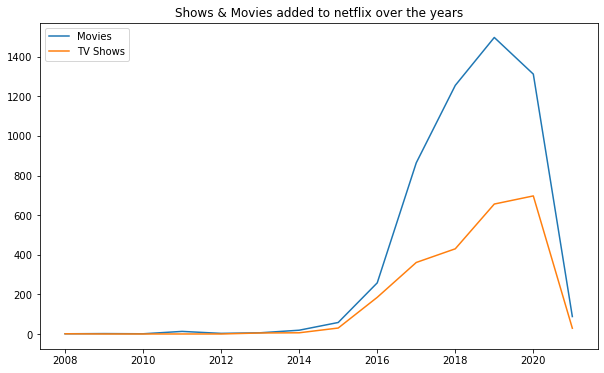

In [110]:
types_over_years = df[["Movie", "TV Show", "year_added"]].groupby("year_added").sum()
fig, ax = plt.subplots(1, figsize=(10,6))
ax.plot(types_over_years["Movie"], label="Movies")
ax.plot(types_over_years["TV Show"], label="TV Shows")
ax.legend()
plt.title("Shows & Movies added to netflix over the years")

The above chart tell us that the "explosion" of netflix, where more movies & shows were added starts in 2016, and still growing until today.
However, we can notice that from 2019 to 2020, there was a decrease in shows added.

Text(0.5, 1.0, 'Shows & Movies added to netflix over the years (2008 - 2020)')

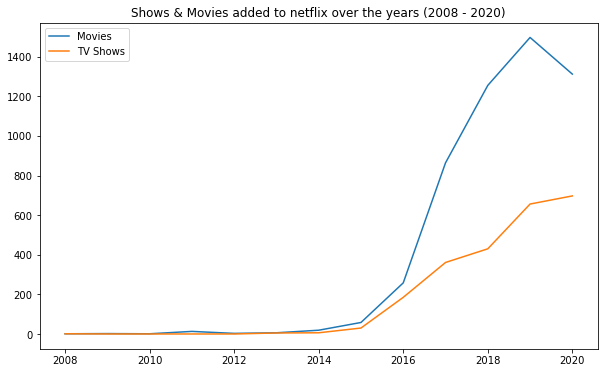

In [115]:
types_over_years_until_2020 = df[df["year_added"]<2021][["Movie", "TV Show", "year_added"]].groupby("year_added").sum()
fig, ax = plt.subplots(1, figsize=(10,6))
ax.plot(types_over_years_until_2020["Movie"], label="Movies")
ax.plot(types_over_years_until_2020["TV Show"], label="TV Shows")
ax.legend()
plt.title("Shows & Movies added to netflix over the years (2008 - 2020)")